In [1]:
!pip install pandas

In [3]:
!pip install "numpy<2"

In [5]:
# Import Libraries and Load Dataset.
import pandas as pd
import numpy as np

In [9]:
# Checking the current working directory to verify the file path.
import os
os.getcwd()

'C:\\Users\\jishu'

In [11]:
df=pd.read_csv("C:/Users/jishu/OneDrive/Ritu/Customer-Churn-Dataset.csv")
df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


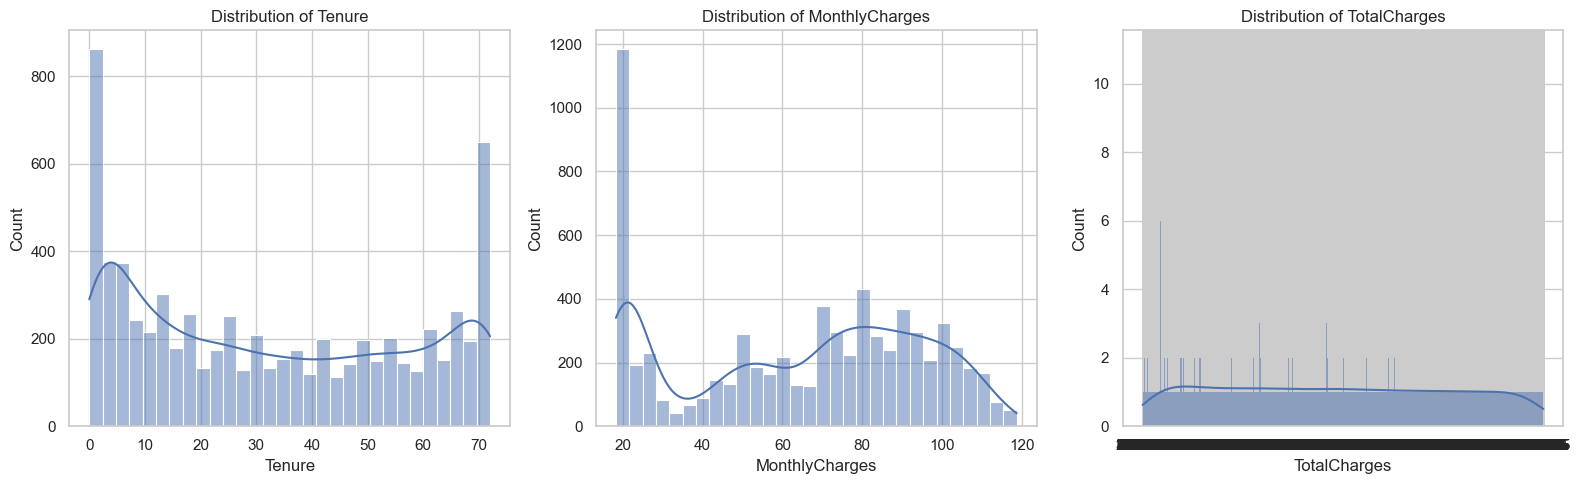

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

numeric_cols = ['Tenure', 'MonthlyCharges', 'TotalCharges']
df = df.dropna(subset=numeric_cols)

# Create figure and axes together
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Loop through columns and axes
for ax, col in zip(axes, numeric_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=ax)
    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()



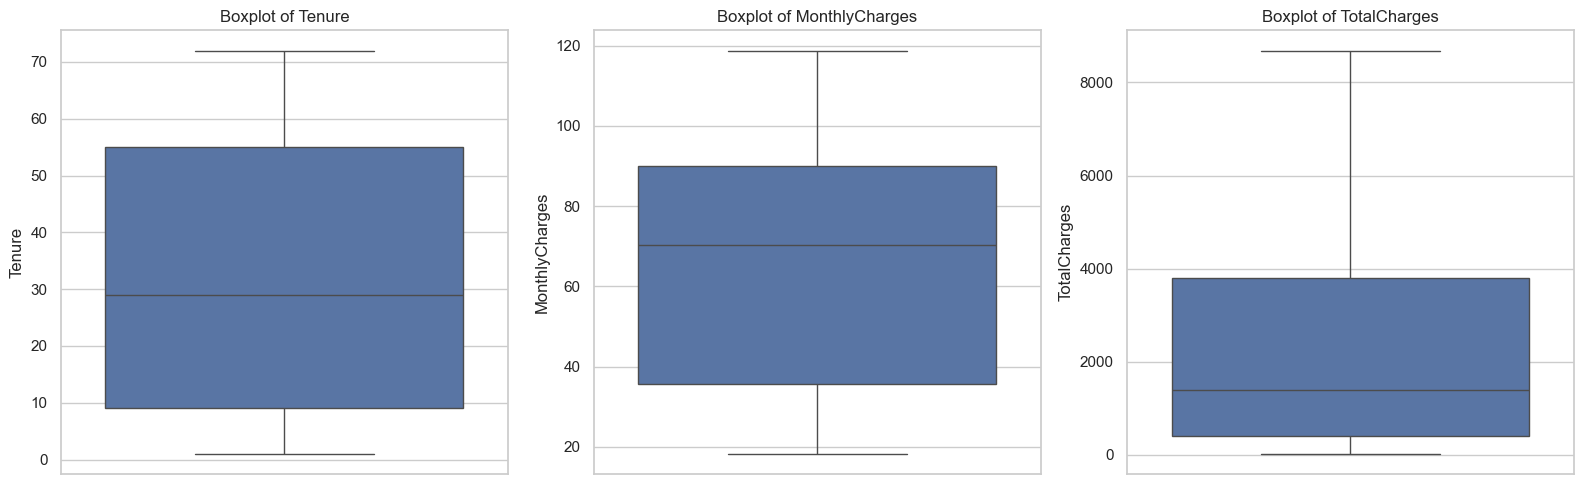

In [40]:
# Define numeric columns BEFORE using them
numeric_features = ['Tenure', 'MonthlyCharges', 'TotalCharges']

# Convert to numeric
df[numeric_features] = df[numeric_features].apply(pd.to_numeric, errors='coerce')

# Replace infinities & drop missing values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=numeric_features, inplace=True)

# BOXPLOTS
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for ax, col in zip(axes, numeric_features):
    sns.boxplot(data=df, y=col, ax=ax)
    ax.set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


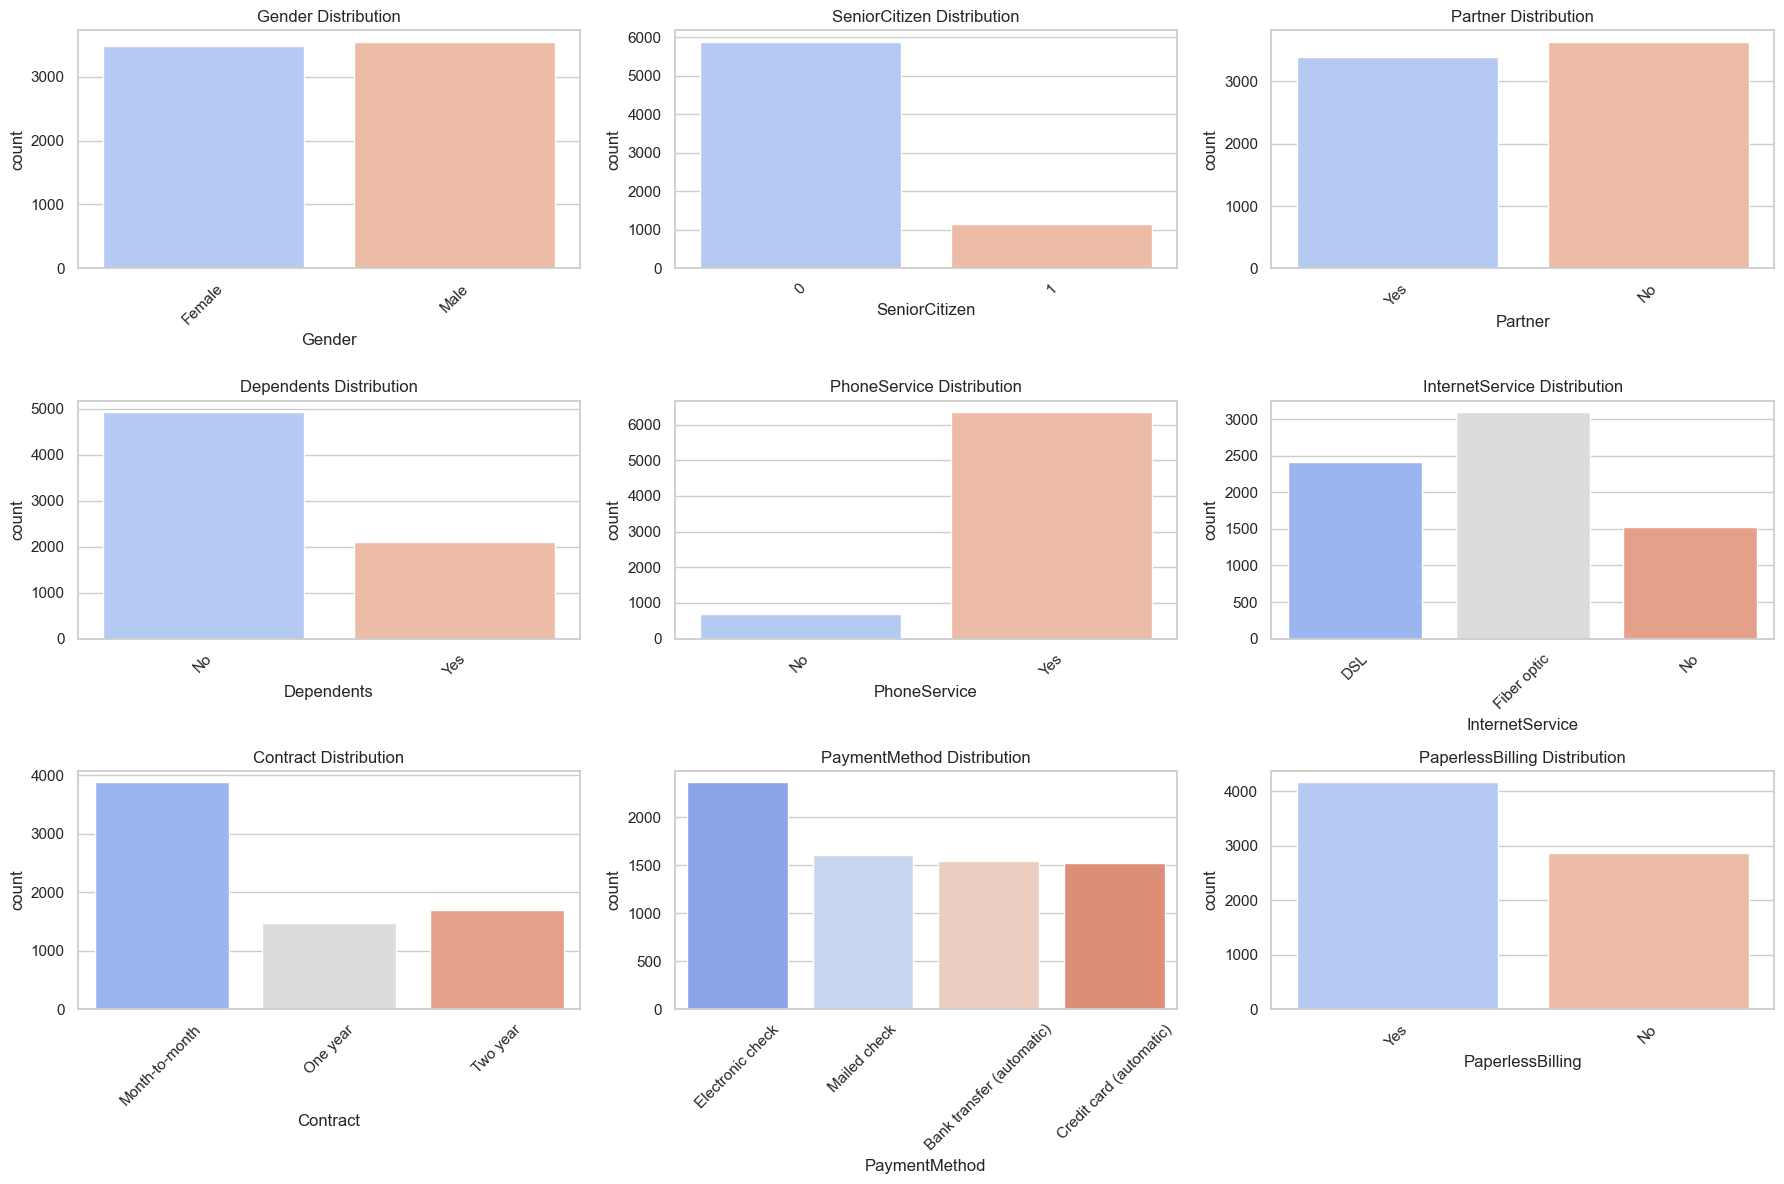

In [46]:
categorical_cols = [
    'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'InternetService', 'Contract',
    'PaymentMethod', 'PaperlessBilling'
]

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axes = axes.ravel()   # Flatten the 2D grid to 1D for easy looping

for ax, col in zip(axes, categorical_cols):
    sns.countplot(data=df, x=col, palette="coolwarm", ax=ax)
    ax.set_title(f"{col} Distribution")
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


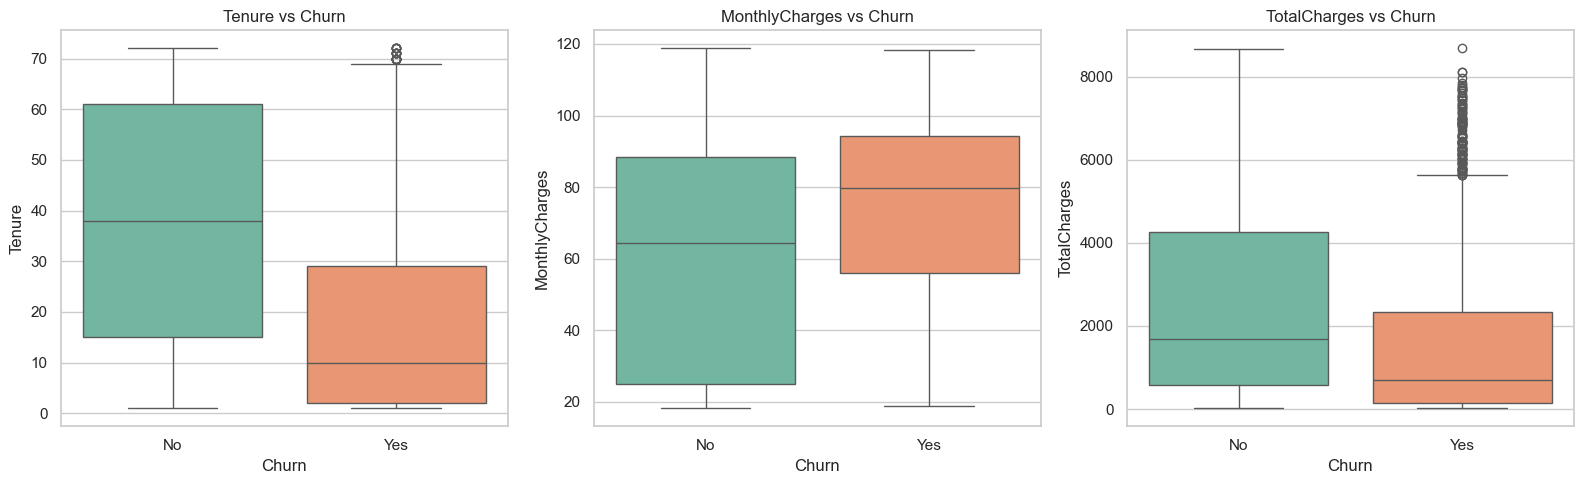

In [50]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for ax, col in zip(axes, numeric_features):
    sns.boxplot(data=df, x='Churn', y=col, palette='Set2', ax=ax)
    ax.set_title(f"{col} vs Churn")

plt.tight_layout()
plt.show()


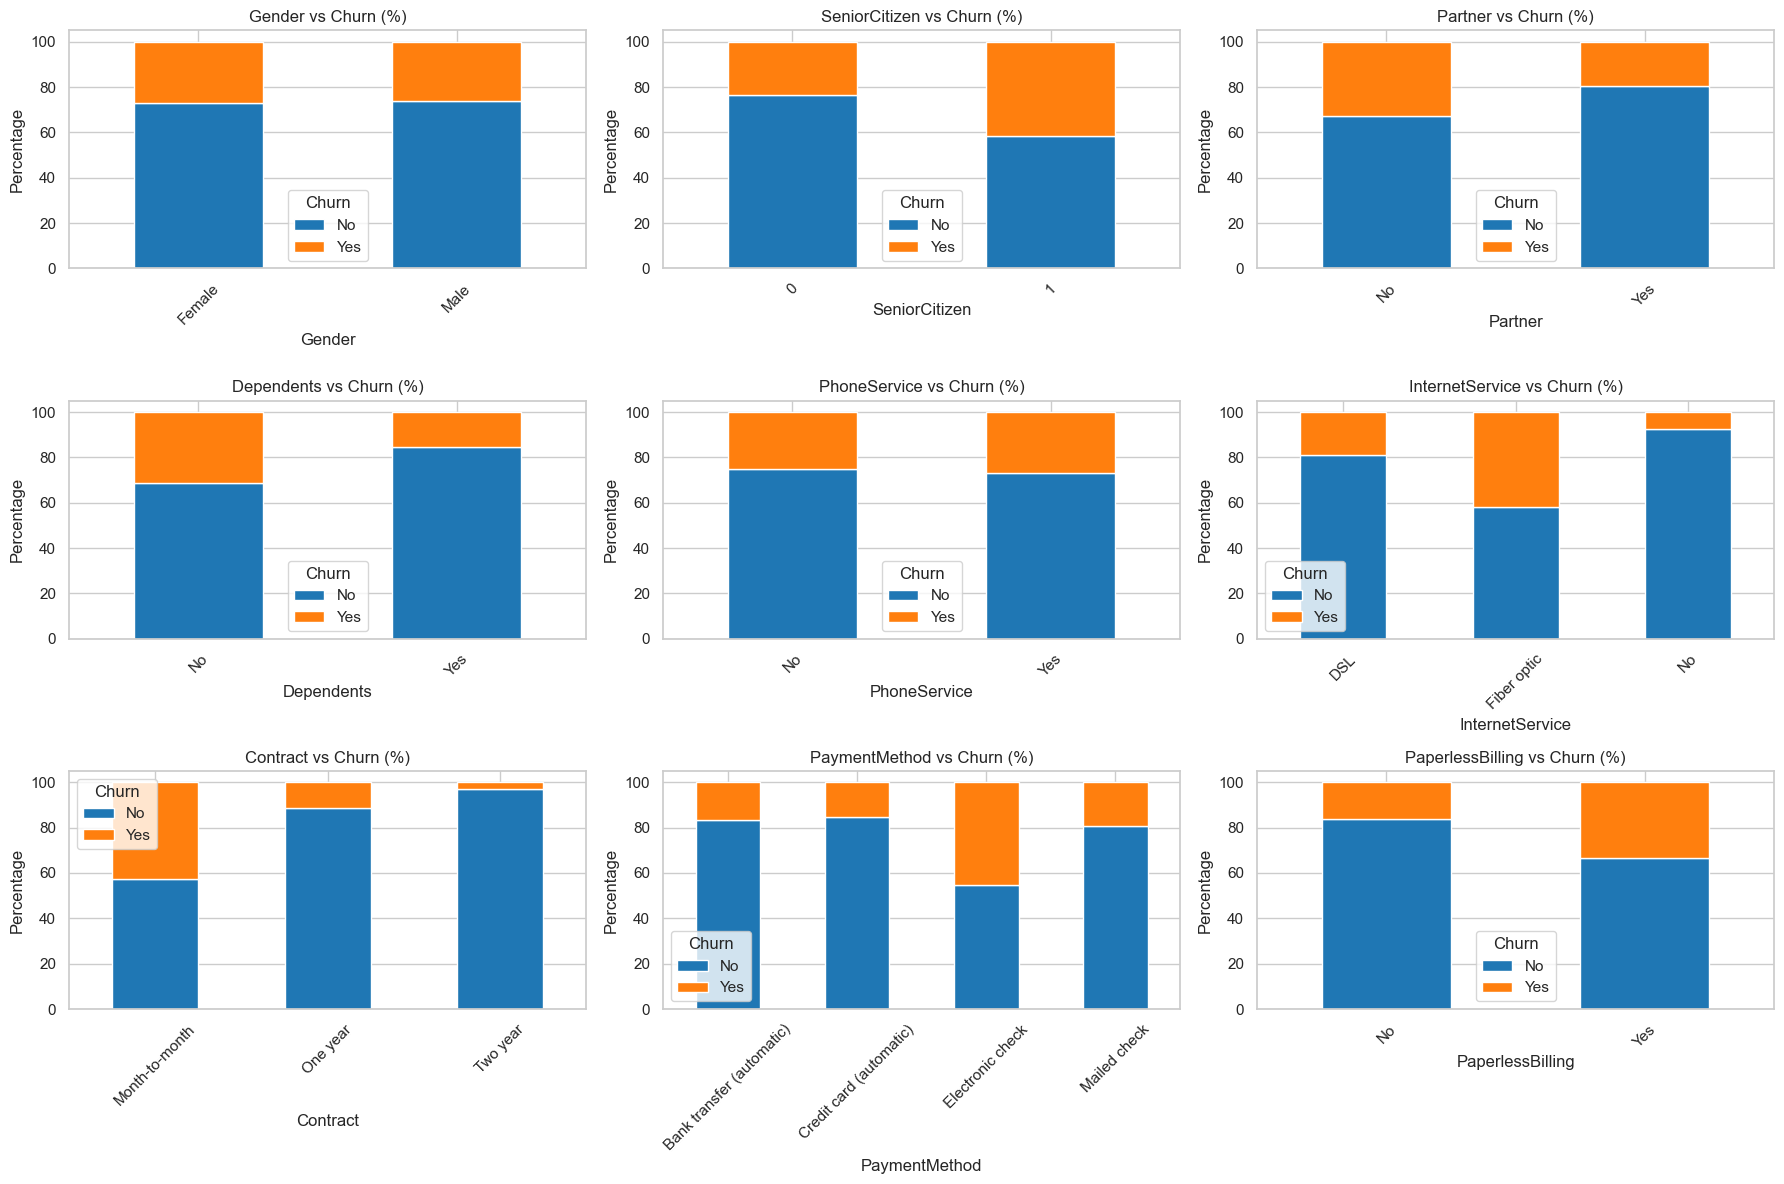

In [54]:
categorical_cols = [
    'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'InternetService', 'Contract',
    'PaymentMethod', 'PaperlessBilling'
]

fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()   # Make it easier to loop

for ax, col in zip(axes, categorical_cols):
    churn_rate = (
        pd.crosstab(df[col], df['Churn'], normalize='index') * 100
    )

    churn_rate.plot(
        kind='bar',
        stacked=True,
        ax=ax,
        color=['#1f77b4', '#ff7f0e']
    )

    ax.set_title(f"{col} vs Churn (%)")
    ax.set_ylabel("Percentage")
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


                  Tenure  MonthlyCharges  TotalCharges     Churn
Tenure          1.000000        0.246862      0.825880 -0.354049
MonthlyCharges  0.246862        1.000000      0.651065  0.192858
TotalCharges    0.825880        0.651065      1.000000 -0.199484
Churn          -0.354049        0.192858     -0.199484  1.000000


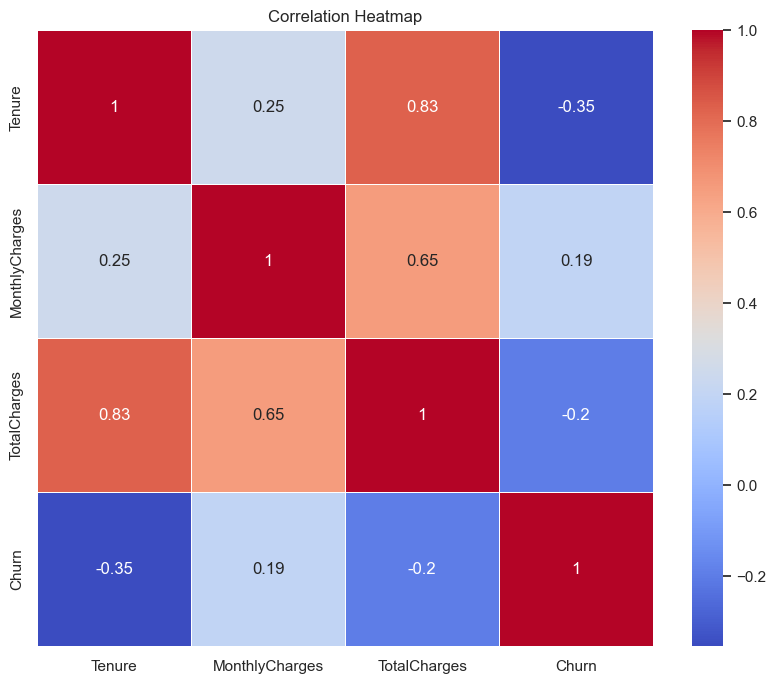

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert to numeric safely
cols = ['Tenure', 'MonthlyCharges', 'TotalCharges']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

# Map churn to numeric
df['Churn'] = df['Churn'].replace({'No': 0, 'Yes': 1})

# Drop rows with missing values
df = df.dropna(subset=cols + ['Churn'])

# Compute correlation matrix
corr_matrix = df[cols + ['Churn']].corr()

# Display
print(corr_matrix)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    linewidths=0.5,
    square=True
)
plt.title("Correlation Heatmap")
plt.show()
